## Downloading Dataset

In [1]:
!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishHnd.tgz

--2021-12-14 11:06:39--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishHnd.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13596287 (13M) [application/x-gzip]
Saving to: ‘EnglishHnd.tgz’

EnglishHnd.tgz      100%[===================>]  12.97M  62.6MB/s    in 0.2s    

2021-12-14 11:06:40 (62.6 MB/s) - ‘EnglishHnd.tgz’ saved [13596287/13596287]



In [2]:
!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz

--2021-12-14 11:06:41--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49817950 (48M) [application/x-gzip]
Saving to: ‘EnglishFnt.tgz’

EnglishFnt.tgz      100%[===================>]  47.51M  87.5MB/s    in 0.5s    

2021-12-14 11:06:41 (87.5 MB/s) - ‘EnglishFnt.tgz’ saved [49817950/49817950]



In [3]:
!mkdir font

In [4]:
!tar zxvf ./EnglishHnd.tgz

English/Hnd/
English/Hnd/all.txt~
English/Hnd/Img/
English/Hnd/Img/Sample029/
English/Hnd/Img/Sample029/img029-006.png
English/Hnd/Img/Sample029/img029-007.png
English/Hnd/Img/Sample029/img029-008.png
English/Hnd/Img/Sample029/img029-009.png
English/Hnd/Img/Sample029/img029-010.png
English/Hnd/Img/Sample029/img029-011.png
English/Hnd/Img/Sample029/img029-012.png
English/Hnd/Img/Sample029/img029-013.png
English/Hnd/Img/Sample029/img029-014.png
English/Hnd/Img/Sample029/img029-015.png
English/Hnd/Img/Sample029/img029-016.png
English/Hnd/Img/Sample029/img029-017.png
English/Hnd/Img/Sample029/img029-018.png
English/Hnd/Img/Sample029/img029-019.png
English/Hnd/Img/Sample029/img029-020.png
English/Hnd/Img/Sample029/img029-021.png
English/Hnd/Img/Sample029/img029-022.png
English/Hnd/Img/Sample029/img029-001.png
English/Hnd/Img/Sample029/img029-002.png
English/Hnd/Img/Sample029/img029-003.png
English/Hnd/Img/Sample029/img029-004.png
English/Hnd/Img/Sample029/img029-024.png
English/Hnd/Img/Samp

In [5]:
!tar zxvf ./EnglishFnt.tgz -C ./font

English/Fnt/
English/Fnt/Sample029/
English/Fnt/Sample029/img029-00006.png
English/Fnt/Sample029/img029-00007.png
English/Fnt/Sample029/img029-00008.png
English/Fnt/Sample029/img029-00009.png
English/Fnt/Sample029/img029-00010.png
English/Fnt/Sample029/img029-00011.png
English/Fnt/Sample029/img029-00012.png
English/Fnt/Sample029/img029-00013.png
English/Fnt/Sample029/img029-00014.png
English/Fnt/Sample029/img029-00015.png
English/Fnt/Sample029/img029-00016.png
English/Fnt/Sample029/img029-00017.png
English/Fnt/Sample029/img029-00018.png
English/Fnt/Sample029/img029-00019.png
English/Fnt/Sample029/img029-00020.png
English/Fnt/Sample029/img029-00021.png
English/Fnt/Sample029/img029-00023.png
English/Fnt/Sample029/img029-00024.png
English/Fnt/Sample029/img029-00025.png
English/Fnt/Sample029/img029-00026.png
English/Fnt/Sample029/img029-00027.png
English/Fnt/Sample029/img029-00028.png
English/Fnt/Sample029/img029-00029.png
English/Fnt/Sample029/img029-00030.png
English/Fnt/Sample029/img029

In [6]:
%%time
!rsync -a ./font/English/Fnt/ ./English/Hnd/Img/

# merfeing folders of same name

CPU times: user 135 ms, sys: 24.6 ms, total: 159 ms
Wall time: 7.03 s


In [7]:
!rm ./English/Hnd/Img/all.txt~

In [8]:
!ls ./English/Hnd/Img/

# listing the directory

Sample001  Sample010  Sample019  Sample028  Sample037  Sample046  Sample055
Sample002  Sample011  Sample020  Sample029  Sample038  Sample047  Sample056
Sample003  Sample012  Sample021  Sample030  Sample039  Sample048  Sample057
Sample004  Sample013  Sample022  Sample031  Sample040  Sample049  Sample058
Sample005  Sample014  Sample023  Sample032  Sample041  Sample050  Sample059
Sample006  Sample015  Sample024  Sample033  Sample042  Sample051  Sample060
Sample007  Sample016  Sample025  Sample034  Sample043  Sample052  Sample061
Sample008  Sample017  Sample026  Sample035  Sample044  Sample053  Sample062
Sample009  Sample018  Sample027  Sample036  Sample045  Sample054


In [9]:
!rm -r ./font

## Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Dataset Processing

In [11]:
# pixels range from 0 to 255 so dividing by 255 so value lie between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train = train_datagen.flow_from_directory(
    directory = "./English/Hnd/Img/",
    target_size=(300, 300),
    subset='training') # set 80% data as training data 

Found 53134 images belonging to 62 classes.


In [12]:
val = train_datagen.flow_from_directory(
    directory = "./English/Hnd/Img/",
    target_size=(300, 300),
    subset='validation') #rest 20% as validation

Found 13268 images belonging to 62 classes.


## Model Architecture

In [13]:
model = tf.keras.models.Sequential([
    #input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 52 output neuron.
    tf.keras.layers.Dense(62, activation='softmax')
])


2021-12-14 11:07:20.456820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 11:07:20.566346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 11:07:20.567426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 11:07:20.569074: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Spliting val into X_val and y_val

In [16]:
from tqdm import tqdm
# extracting values from val test generator
val.reset()
X_val,y_val = next(val)
for i in tqdm(range(int(len(val)/32)-1)): #1st batch is already fetched before the for loop.
    img, label = next(val)
    X_val = np.append(X_val, img, axis=0 )
    y_val = np.append(y_val, label, axis=0)
print(X_val.shape, y_val.shape)

100%|██████████| 11/11 [00:01<00:00,  6.77it/s]

(384, 300, 300, 3) (384, 62)


In [17]:
# checkpointer monitors model performance to prevent overfit
checkpointer = EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 20)

## Model Training

In [18]:
%%time
history = model.fit(
            train ,
            steps_per_epoch =len(train)//32, #batch size is 32
            epochs=1000,
            verbose=1,
            validation_data=(X_val,y_val),
            callbacks = [checkpointer])

2021-12-14 11:07:27.939620: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000


2021-12-14 11:07:29.674701: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


51/51 [==============================] - 15s 145ms/step - loss: 3.7817 - accuracy: 0.0950 - val_loss: 2.3652 - val_accuracy: 0.4427
Epoch 2/1000
51/51 [==============================] - 7s 143ms/step - loss: 1.8682 - accuracy: 0.5362 - val_loss: 1.2428 - val_accuracy: 0.6380
Epoch 3/1000
51/51 [==============================] - 7s 138ms/step - loss: 1.4041 - accuracy: 0.6324 - val_loss: 0.9616 - val_accuracy: 0.7344
Epoch 4/1000
51/51 [==============================] - 6s 127ms/step - loss: 1.1250 - accuracy: 0.6955 - val_loss: 0.7589 - val_accuracy: 0.7708
Epoch 5/1000
51/51 [==============================] - 7s 146ms/step - loss: 0.9802 - accuracy: 0.7267 - val_loss: 0.6775 - val_accuracy: 0.7917
Epoch 6/1000
51/51 [==============================] - 7s 144ms/step - loss: 0.8774 - accuracy: 0.7555 - val_loss: 0.6467 - val_accuracy: 0.8151
Epoch 7/1000
51/51 [==============================] - 7s 137ms/step - loss: 0.8002 - accuracy: 0.7745 - val_loss: 0.6839 - val_accuracy: 0.7917
Epoc

## Model Performance

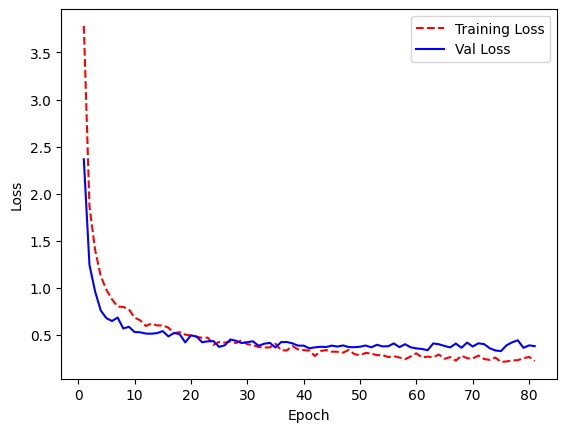

In [19]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

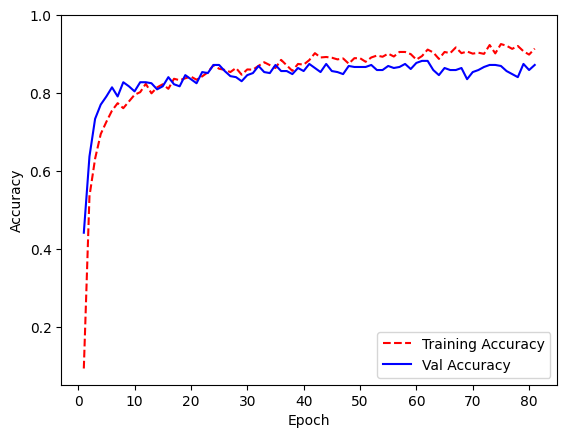

In [20]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

In [21]:
# saving the model
model.save("characterrecognition.h5")

In [22]:
print(f"Validation accuracy = {model.evaluate(val ,batch_size=32,steps=len(val)//32)[1]*100}%")

12/12 [==============================] - 1s 99ms/step - loss: 0.3500 - accuracy: 0.8828
Validation accuracy = 88.28125%


## Examples

In [23]:
# next function assigns one batch to variables, i.e x_test,y_test will have 32 images
x_test,y_test = next(val)
predict = model.predict(x_test)

In [24]:
# takes index as argument and returns the true class value
def get_real_value(i):
    if i<10:
#         0-9
        return i
    elif i<36:
#         A-Z
        return chr(i+55)
    else:
#         a-z
        return chr(i+61)

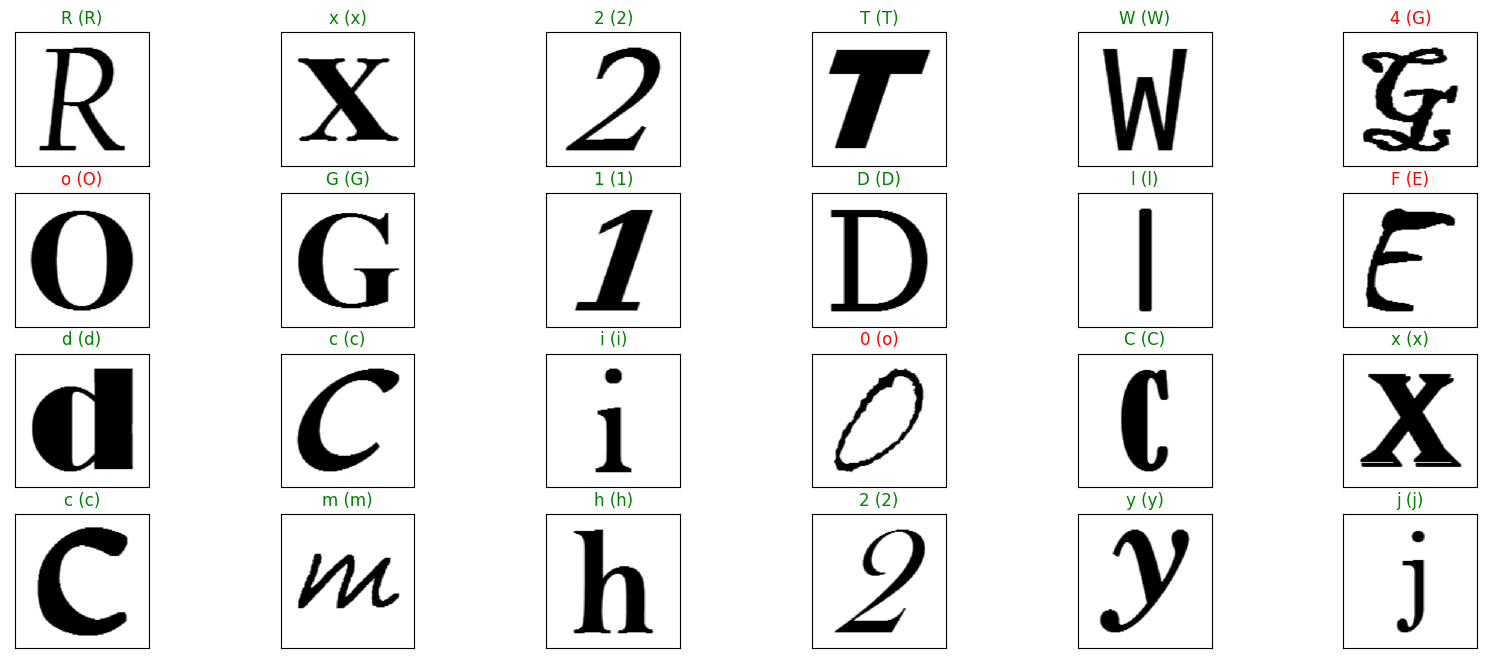

In [25]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = get_real_value(np.argmax(predict[index]))
    true_index = get_real_value(np.argmax(y_test[index]))
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

## Cleanup

In [26]:
%%time
!rm -r ./English
!rm ./EnglishHnd.tgz
!rm ./EnglishFnt.tgz

CPU times: user 47.3 ms, sys: 95.4 ms, total: 143 ms
Wall time: 4.4 s
